# HW:
- создать БД SQLite с таблицами, как в примерах из википедии
- построить все виды join запросов  (вспомним про UNION)

Внимательно изучить эту картинку про Join (и ее аналоги в интернете)
https://dsin.files.wordpress.com/2013/03/sqljoins_cheatsheet.png

Прочитать про Join в SQL
https://ru.wikipedia.org/wiki/Join_(SQL)

In [1]:
import sqlite3
from prettytable import from_db_cursor

In [2]:
import os

# Временный каталог
TEMP_DIR = "temp"

if not os.path.exists(TEMP_DIR):
    os.mkdir(TEMP_DIR)

# Пример использования
os.path.join(TEMP_DIR, "temp_SQLite.db")

'temp\\temp_SQLite.db'

In [3]:
#db_name = os.path.join(TEMP_DIR, 'temp_SQLite.db')
db_name = ":memory:"

if os.path.isfile(db_name):
    os.remove(db_name)
    print(f"Файл [{db_name}] - удален")

In [4]:
db = sqlite3.connect(db_name)
cur = db.cursor()

In [5]:
cur.execute("CREATE TABLE cities (id integer primary key AUTOINCREMENT NOT NULL, name varchar(100))")
db.commit()

cur.execute("PRAGMA table_info('cities')")
from_db_cursor(cur)

cid,name,type,notnull,dflt_value,pk
0,id,INTEGER,1,None,1
1,name,varchar(100),0,None,0


In [6]:
cur.execute("CREATE TABLE persons (name varchar(100))")
db.commit()

cur.execute("PRAGMA table_info('persons')")
from_db_cursor(cur)

cid,name,type,notnull,dflt_value,pk
0,name,varchar(100),0,None,0


In [7]:
cities = "Москва, Санкт-Петербург, Казань".split(', ')
cur.executemany("INSERT INTO cities (name) VALUES (?)", [(i,) for i in cities])

cur.execute("SELECT * FROM cities")
from_db_cursor(cur)

id,name
1,Москва
2,Санкт-Петербург
3,Казань


In [8]:
persons = "Андрей, Леонид, Сергей, Григорий".split(', ')
cur.executemany("INSERT INTO persons (name) VALUES (?)", [(i,) for i in persons])
cur.execute("ALTER TABLE persons ADD COLUMN CityId INTEGER DEFAULT 1 NOT NULL")
cur.execute('UPDATE persons SET CityId = 1 WHERE name = "Андрей"')
cur.execute('UPDATE persons SET CityId = 2 WHERE name = "Леонид"')
cur.execute('UPDATE persons SET CityId = 1 WHERE name = "Сергей"')
cur.execute('UPDATE persons SET CityId = 4 WHERE name = "Григорий"')

cur.execute("SELECT * FROM persons")
from_db_cursor(cur)

name,CityId
Андрей,1
Леонид,2
Сергей,1
Григорий,4


## INNER JOIN

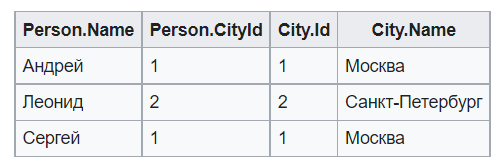

In [10]:
cur.execute("SELECT * FROM persons INNER JOIN cities ON persons.CityId = cities.Id")
result = cur.fetchall()
for row in result:
    print(row)

('Андрей', 1, 1, 'Москва')
('Леонид', 2, 2, 'Санкт-Петербург')
('Сергей', 1, 1, 'Москва')


## LEFT OUTER JOIN

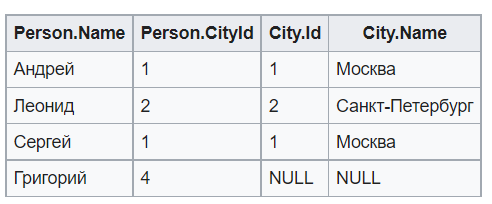

In [11]:
cur.execute("SELECT * FROM persons LEFT OUTER JOIN cities ON persons.CityId = cities.Id")
result = cur.fetchall()
for row in result:
    print(row)

('Андрей', 1, 1, 'Москва')
('Леонид', 2, 2, 'Санкт-Петербург')
('Сергей', 1, 1, 'Москва')
('Григорий', 4, None, None)


## RIGHT OUTER JOIN

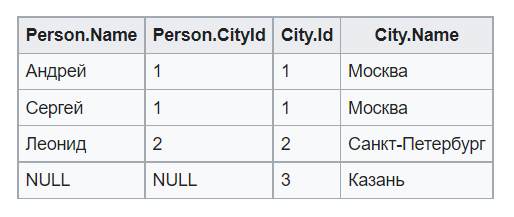

In [16]:
# OperationalError: RIGHT and FULL OUTER JOINs are not currently supported
# cur.execute("SELECT * FROM cities RIGHT OUTER JOIN persons ON persons.CityId = cities.Id")

cur.execute("SELECT * FROM cities LEFT OUTER JOIN persons ON persons.CityId = cities.Id")
result = cur.fetchall()
for row in result:
    print(row)

(1, 'Москва', 'Андрей', 1)
(1, 'Москва', 'Сергей', 1)
(2, 'Санкт-Петербург', 'Леонид', 2)
(3, 'Казань', None, None)


## FULL OUTER JOIN

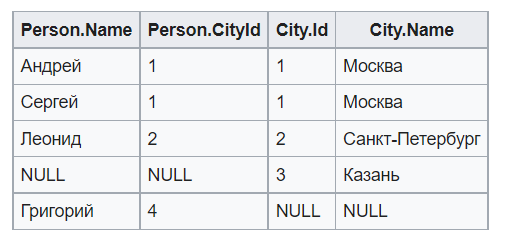

In [18]:
# OperationalError: RIGHT and FULL OUTER JOINs are not currently supported
# cur.execute("SELECT * FROM persons FULL OUTER JOIN cities ON persons.CityId = cities.Id")

cur.execute("SELECT * FROM persons LEFT JOIN cities ON persons.CityId = cities.Id union SELECT * FROM cities LEFT JOIN persons ON persons.CityId = cities.Id")
result = cur.fetchall()
for row in result:
    print(row)


(1, 'Москва', 'Андрей', 1)
(1, 'Москва', 'Сергей', 1)
(2, 'Санкт-Петербург', 'Леонид', 2)
(3, 'Казань', None, None)
('Андрей', 1, 1, 'Москва')
('Григорий', 4, None, None)
('Леонид', 2, 2, 'Санкт-Петербург')
('Сергей', 1, 1, 'Москва')


## CROSS JOIN

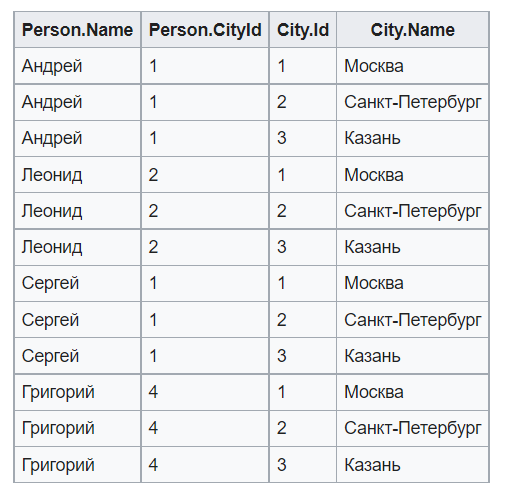

In [19]:
cur.execute("SELECT * FROM persons CROSS JOIN cities")
result = cur.fetchall()
for row in result:
    print(row)

('Андрей', 1, 1, 'Москва')
('Андрей', 1, 2, 'Санкт-Петербург')
('Андрей', 1, 3, 'Казань')
('Леонид', 2, 1, 'Москва')
('Леонид', 2, 2, 'Санкт-Петербург')
('Леонид', 2, 3, 'Казань')
('Сергей', 1, 1, 'Москва')
('Сергей', 1, 2, 'Санкт-Петербург')
('Сергей', 1, 3, 'Казань')
('Григорий', 4, 1, 'Москва')
('Григорий', 4, 2, 'Санкт-Петербург')
('Григорий', 4, 3, 'Казань')
